In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Обычная линейная регрессия (одномерная)

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression (n_samples = 50, n_features= 1,  n_informative = 1, noise = 10, random_state = 11)
#display(X, y)

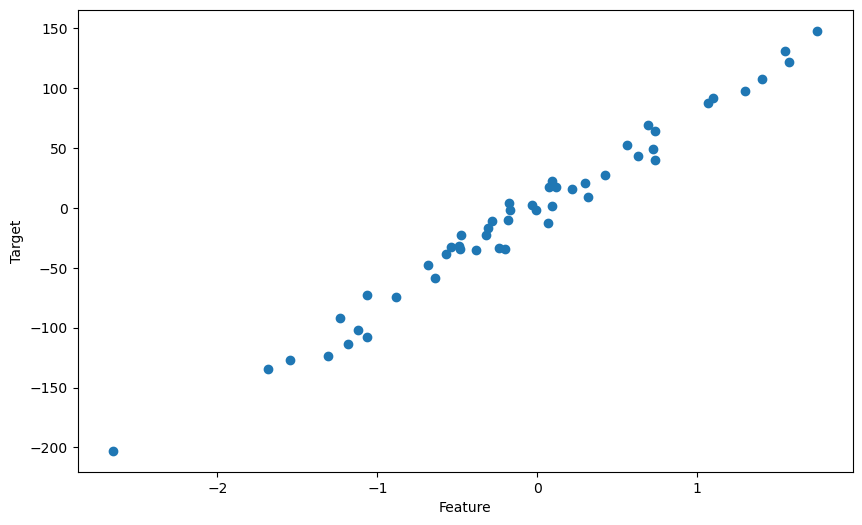

In [3]:
fig = plt.figure ( figsize = (10, 6))
plt.scatter(X, y)

plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [5]:
model.fit(X, y)

print(model.coef_ , model.intercept_)
sklearn_a =  model.coef_[0]
sklearn_b = model.intercept_

[80.41862354] 0.18171887542100773


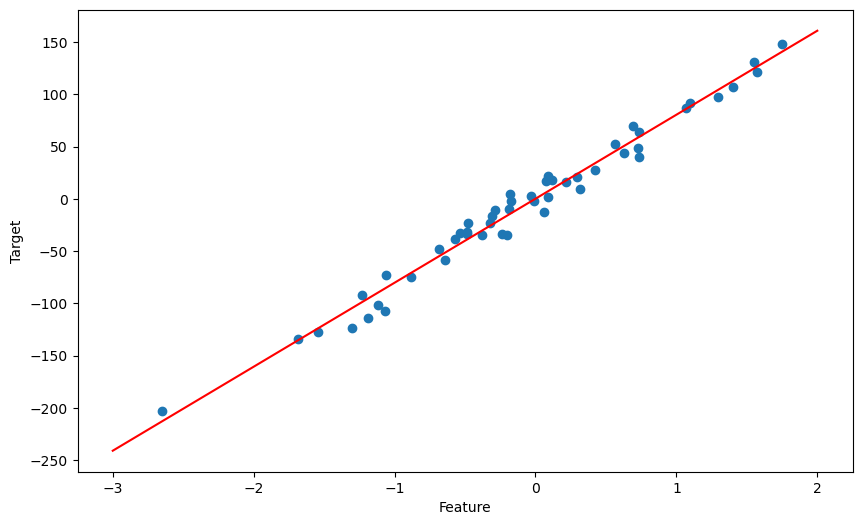

Линейная модель вида: 80.4186235397987x + 0.18171887542100773


In [6]:
x_feature = np.arange(-3, 3)
model_y_sklearn = sklearn_a*x_feature + sklearn_b

fig = plt.figure(figsize = (10, 6))
plt.plot(x_feature, model_y_sklearn, color = 'r')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.scatter(X, y)
plt.show()
print(f'Линейная модель вида: {sklearn_a}x + {sklearn_b}')

Пример предсказания:

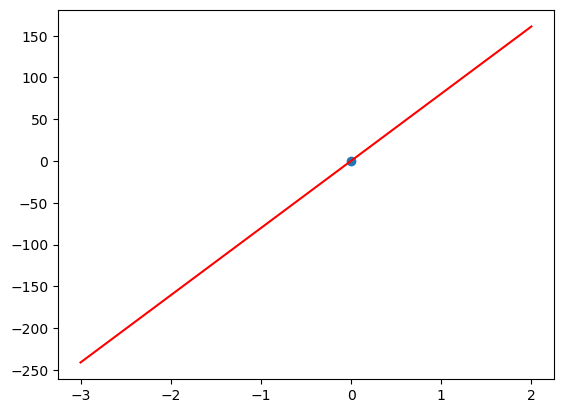

In [7]:
x = 0
y_target = sklearn_a*x+ sklearn_b

plt.scatter(x, y_target)
plt.plot(x_feature, model_y_sklearn, color = 'r')
plt.show()

своя реализация

In [8]:
df = pd.DataFrame({'X': X[:, 0], 'y' : y, 'prediction' : sklearn_a*X[:, 0]+ sklearn_b})
df.head()

,X,y,prediction
0,0.630080,43.654341,50.851871
1,-1.061634,-72.682350,-85.193462
2,0.296347,21.196446,24.013545
3,1.402771,107.587651,112.990641
4,0.689682,69.620632,55.645021


In [9]:
def MSE(X, w1, w0, y):
    y_pred = w1*X[:, 0] + w0
    return np.sum( (y-y_pred)**2 / (len(y_pred)+1)) 

def MSE_grad_w0(X, w1, w0, y):
    y_pred = w1*X[:, 0] + w0
    return 2/(len(X)+1) * np.sum( (y - y_pred ))*(-1) # -1 - производная по w0  
                     
def MSE_grad_w1(X, w1, w0, y):
    y_pred = w1*X[:, 0] + w0
    return 2/(len(X)+1) * np.sum( (y - y_pred)* np.array( [-X[:,0]])) # -X - производная по w1 


In [10]:
# начальная точка

w1 = 0
w0 = 0

learning_rate = 0.01

next_w1 = w1
next_w0 = w0

max_iterations = 1000
eps = 10**(-6)
it = 1
while (it <= max_iterations):
    cur_w1 = next_w1
    cur_w0 = next_w0
    
    next_w1 =  cur_w1 - learning_rate * MSE_grad_w1(X, cur_w1, cur_w0, y)
    next_w0 =  cur_w0 - learning_rate * MSE_grad_w0(X, cur_w1, cur_w0, y)
    
    print(f'Итерация: {it}')
    print(f'Текущая точка: {cur_w1}x + {cur_w0}')
    print(f'Следующая точка: {next_w1}x + {next_w0}')
    print(f'Mean Squared Error: {round(MSE(X, cur_w1, cur_w0, y), 3)}')
    it+=1
    if abs(cur_w1 - next_w1) <= eps and abs(cur_w0 - next_w0) <= eps:
        break
        

Итерация: 1
Текущая точка: 0x + 0
Следующая точка: 1.298539813557112x + -0.13648773069168443
Mean Squared Error: 5329.835
Итерация: 2
Текущая точка: 1.298539813557112x + -0.13648773069168443
Следующая точка: 2.575868970426488x + -0.26803779500950453
Mean Squared Error: 5160.763
Итерация: 3
Текущая точка: 2.575868970426488x + -0.26803779500950453
Следующая точка: 3.8323386469622345x + -0.3947839487779894
Mean Squared Error: 4997.239
Итерация: 4
Текущая точка: 3.8323386469622345x + -0.3947839487779894
Следующая точка: 5.068294114664474x + -0.5168567135769044
Mean Squared Error: 4839.079
Итерация: 5
Текущая точка: 5.068294114664474x + -0.5168567135769044
Следующая точка: 6.284074841182259x + -0.6343834504412514
Mean Squared Error: 4686.105
Итерация: 6
Текущая точка: 6.284074841182259x + -0.6343834504412514
Следующая точка: 7.48001458955682x + -0.7474884319402721
Mean Squared Error: 4538.144
Итерация: 7
Текущая точка: 7.48001458955682x + -0.7474884319402721
Следующая точка: 8.6564415157363

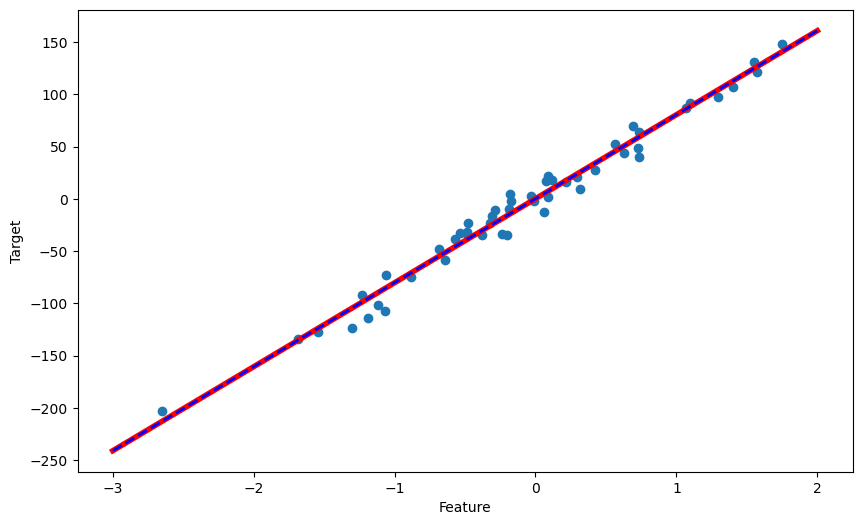

Линейная модель sklearn вида: 80.4186235397987x + 0.18171887542100773
Наша линейная модель вида: 80.41856026548236x + 0.18169287738935677


In [11]:
x_feature = np.arange(-3, 3)
#model_y_sklearn = sklearn_a*x_feature + sklearn_b

model_y_our = next_w1*x_feature + next_w0

fig = plt.figure(figsize = (10, 6))
plt.plot(x_feature, model_y_sklearn, linewidth = 4, color = 'r')
plt.plot(x_feature, model_y_our, '--', linewidth = 2,color = 'b')
plt.plot()
plt.xlabel('Feature')
plt.ylabel('Target')
plt.scatter(X, y)
plt.show()
print(f'Линейная модель sklearn вида: {sklearn_a}x + {sklearn_b}')
print(f'Наша линейная модель вида: {next_w1}x + {next_w0}')

Многомерная регрессия

In [12]:
from sklearn.datasets import make_regression

X, y, coefficients = make_regression (n_samples = 50, n_features= 3,  n_informative = 3, noise = 10, coef = True,random_state = 11)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [14]:
model.fit(X, y)

print(model.coef_ , model.intercept_)
sklearn_a =  model.coef_
sklearn_b = model.intercept_ 

[16.03610262 26.27272897 95.12674829] -0.470328599082972


In [15]:
X.shape
count_weights = X.shape[1]
X

array([[-1.06560298, -0.47573349, -0.88623967],
       [-2.65331856, -0.31963136, -0.00828463],
       [-1.29742262,  0.51447963, -0.71496244],
       [ 0.76616062, -0.26434233, -0.99402769],
       [-0.64257539, -0.57395456, -0.17809318],
       [-0.42442882,  1.65920462, -0.1329099 ],
       [-0.03107509,  1.0956297 , -0.68344663],
       [ 0.85866717,  1.11487028, -1.26407368],
       [-0.43205762,  0.45539286,  0.51608404],
       [ 2.20185631,  1.93290543, -0.0370669 ],
       [-0.53662936,  0.42105072,  0.31540267],
       [-0.96420485,  0.2716063 ,  0.07175977],
       [ 0.43477699,  0.0716521 ,  0.87427277],
       [-0.17241977,  1.06755846,  0.09183837],
       [ 0.25771638,  0.50502192, -0.49673048],
       [ 1.29561858, -1.23234621, -0.23725045],
       [-0.52937203, -1.08019383,  1.56170369],
       [ 0.03679475,  1.7915311 , -0.04870254],
       [-1.06163445,  0.1178195 ,  0.21734821],
       [-1.63905163,  0.81776957, -0.64730263],
       [ 1.74945474, -0.48456513, -0.286

In [16]:
X = np.column_stack([X, np.ones((X.shape[0]))])
X

array([[-1.06560298, -0.47573349, -0.88623967,  1.        ],
       [-2.65331856, -0.31963136, -0.00828463,  1.        ],
       [-1.29742262,  0.51447963, -0.71496244,  1.        ],
       [ 0.76616062, -0.26434233, -0.99402769,  1.        ],
       [-0.64257539, -0.57395456, -0.17809318,  1.        ],
       [-0.42442882,  1.65920462, -0.1329099 ,  1.        ],
       [-0.03107509,  1.0956297 , -0.68344663,  1.        ],
       [ 0.85866717,  1.11487028, -1.26407368,  1.        ],
       [-0.43205762,  0.45539286,  0.51608404,  1.        ],
       [ 2.20185631,  1.93290543, -0.0370669 ,  1.        ],
       [-0.53662936,  0.42105072,  0.31540267,  1.        ],
       [-0.96420485,  0.2716063 ,  0.07175977,  1.        ],
       [ 0.43477699,  0.0716521 ,  0.87427277,  1.        ],
       [-0.17241977,  1.06755846,  0.09183837,  1.        ],
       [ 0.25771638,  0.50502192, -0.49673048,  1.        ],
       [ 1.29561858, -1.23234621, -0.23725045,  1.        ],
       [-0.52937203, -1.

In [17]:
def MSE(X, w, y):
    y_pred = X@w
    return np.sum( (y-y_pred)**2 / (len(y_pred)+1)) 

def MSE_grad(X, w, y):
    y_pred = X@w
    return 2/(len(X)+1) *(y - y_pred )@(-X) 

In [18]:
weights = np.zeros((count_weights+1))

learning_rate = 0.01

next_weights = weights

max_iterations = 10000
eps = 10**(-3)
it = 1
while (it <= max_iterations):
    cur_weights = next_weights
    
    next_weights =  cur_weights - learning_rate * MSE_grad(X, cur_weights, y)
    
    print(f'Итерация: {it}')
    print(f'Mean Squared Error: {round(MSE(X, cur_weights, y), 3)}')
    it+=1
    if np.linalg.norm(cur_weights - next_weights, ord = 2) <= eps:
        break

Итерация: 1
Mean Squared Error: 6554.436
Итерация: 2
Mean Squared Error: 6379.119
Итерация: 3
Mean Squared Error: 6208.932
Итерация: 4
Mean Squared Error: 6043.712
Итерация: 5
Mean Squared Error: 5883.301
Итерация: 6
Mean Squared Error: 5727.547
Итерация: 7
Mean Squared Error: 5576.302
Итерация: 8
Mean Squared Error: 5429.426
Итерация: 9
Mean Squared Error: 5286.781
Итерация: 10
Mean Squared Error: 5148.234
Итерация: 11
Mean Squared Error: 5013.659
Итерация: 12
Mean Squared Error: 4882.931
Итерация: 13
Mean Squared Error: 4755.932
Итерация: 14
Mean Squared Error: 4632.546
Итерация: 15
Mean Squared Error: 4512.662
Итерация: 16
Mean Squared Error: 4396.173
Итерация: 17
Mean Squared Error: 4282.975
Итерация: 18
Mean Squared Error: 4172.967
Итерация: 19
Mean Squared Error: 4066.053
Итерация: 20
Mean Squared Error: 3962.138
Итерация: 21
Mean Squared Error: 3861.132
Итерация: 22
Mean Squared Error: 3762.946
Итерация: 23
Mean Squared Error: 3667.498
Итерация: 24
Mean Squared Error: 3574.703
И

In [19]:
print(f'Веса при признаках: {next_weights[:]}')
print(f'Настоящие веса линейной регрессии: {coefficients}')

Веса при признаках: [16.04201752 26.21559011 95.06406426 -0.43342483]
Настоящие веса линейной регрессии: [17.59034817 29.10379758 96.13877718]


In [20]:
import plotly
import plotly.graph_objs as go

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [36]:
# Генерация случайных данных
np.random.seed(0)
n_samples = 100
X = np.random.rand(n_samples, 2)  # Две независимые переменные
y = 2 * X[:, 0] + 3 * X[:, 1] + 5 + 0.1*np.random.randn(n_samples)  # Зависимая переменная с шумом
# Создание модели линейной регрессии
model = LinearRegression()
model.fit(X, y)

# Предсказание значений с помощью модели
X_pred = np.array([[0, 0], [1, 1]])  # Примерные значения для предсказания
y_pred = model.predict(X_pred)

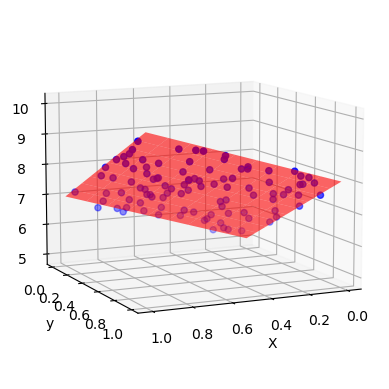

<Figure size 640x480 with 0 Axes>

In [41]:
# Создание 3D графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Построение точек данных
ax.scatter(X[:, 0], X[:, 1], y, c='b', marker='o', label='Данные')

# Построение плоскости регрессии
xx, yy = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
zz = model.intercept_ + model.coef_[0] * xx + model.coef_[1] * yy
ax.plot_surface(xx, yy, zz, alpha=0.6, color='r', label='Плоскость регрессии')

# Настройка осей и легенды
ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=10, azim=65)
plt.savefig("plt.png")

plt.show()
plt.savefig("plt.png")

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
# Генерация случайных данных с двумя классами
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

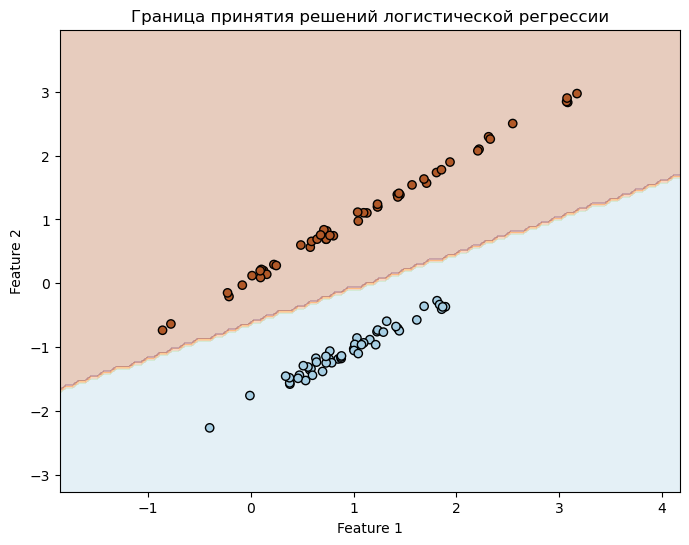

In [47]:
# Создание модели логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание значений с помощью модели
y_pred = model.predict(X_test)

# Создание сетки для визуализации разделяющей границы
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Построение графика
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Граница принятия решений логистической регрессии')
plt.show()